<a href="https://colab.research.google.com/github/Aranzazu21/Machine-Learning/blob/main/Polynomial_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tutorial completo: Regresión Polinomial en Python


La **Regresión Polinomial** es una técnica de *aprendizaje supervisado* que se usa cuando los datos no siguen una relación lineal perfecta.  
Mientras que la regresión lineal ajusta una línea recta, la regresión polinomial puede ajustar una **curva** que se adapta mejor a los datos.

# Análisis de Salarios por Nivel con Regresión Lineal y Polinómica

Este notebook está basado en el artículo de ejemplo que analiza la relación entre el nivel laboral y el salario.  

Se implementarán técnicas de **Regresión Lineal** y **Regresión Polinómica**, con explicaciones paso a paso de los fundamentos, el modelo matemático y el código Python empleado.



## 2.1 Fundamentos de la técnica

La **Regresión Lineal** busca ajustar una **línea recta** a los datos, describiendo la relación entre una variable independiente (X) y una dependiente (Y) mediante la ecuación:

\[
Y = B_0 + B_1X
\]

- **B0**: Intercepto, salario base cuando Level = 0.  
- **B1**: Pendiente, cambio de salario por cada incremento en Level.  

La **Regresión Polinómica** extiende la regresión lineal incluyendo términos de mayor grado:

\[
Y = B_0 + B_1X + B_2X^2 + ... + B_nX^n
\]

- Permite ajustar **curvas no lineales**, capturando incrementos de salario que no siguen una línea recta.


## 2.2 Modelo Matemático

1. **Regresión Lineal**:

\[
Y = B_0 + B_1 X
\]

- Ajusta los parámetros **B0** y **B1** minimizando el error cuadrático medio (MSE).  

2. **Regresión Polinómica**:

\[
Y = B_0 + B_1 X + B_2 X^2 + ... + B_n X^n
\]

- Transforma la variable independiente en `[1, X, X^2, ..., X^n]`.  
- Se aplica regresión lineal sobre estas nuevas características para capturar curvas complejas.


| Librería               | Función principal                                       | Ejemplo de uso                          |
| ---------------------- | ------------------------------------------------------- | --------------------------------------- |
| **pandas**             | Trabajar con datos tabulares (como hojas de cálculo).   | `pd.read_csv('archivo.csv')`            |
| **numpy**              | Cálculos numéricos y algebra lineal.                    | `np.array([1,2,3])`                     |
| **matplotlib.pyplot**  | Crear gráficos y visualizaciones personalizadas.        | `plt.plot(x, y)`                        |
| **seaborn**            | Simplifica y mejora los gráficos de Matplotlib.         | `sns.histplot(df['columna'])`           |
| **train_test_split**   | Divide datos en subconjuntos de entrenamiento y prueba. | `X_train, X_test = train_test_split(X)` |
| **PolynomialFeatures** | Crea nuevas columnas con potencias de X (x², x³, etc.). | `poly.fit_transform(X)`                 |
| **LinearRegression**   | Crea el modelo de regresión.                            | `model.fit(X, y)`                       |
| **r2_score**           | Evalúa qué tan bien predice el modelo.                  | `r2_score(y_true, y_pred)`              |


In [6]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score


In [7]:


data = {
    'Position': ['Business Analyst', 'Junior Consultant', 'Senior Consultant', 'Manager',
                 'Country Manager', 'Project Manager', 'Senior Manager', 'Director',
                 'Senior Director', 'VP'],
    'Level': [1,2,3,4,5,6,7,8,9,10],
    'Salary': [45000,50000,60000,80000,110000,150000,200000,300000,500000,1000000]
}

df_sal = pd.DataFrame(data)
df_sal.head()


,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


###  Explicación

- Se utiliza un **diccionario de Python** para definir los datos de posiciones, niveles y salarios.  
- `pd.DataFrame(data)`: convierte el diccionario en un DataFrame, estructura tabular utilizada por pandas.  
- `.head()`: muestra las primeras filas para validar que los datos se cargaron correctamente.  
- Esta técnica permite trabajar en Colab sin depender de un archivo CSV externo.


In [8]:
# Estadísticas descriptivas
df_sal.describe()


,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


###  Explicación

- `.describe()` genera estadísticas básicas de cada columna numérica:
  - `count`: número de registros.  
  - `mean`: promedio.  
  - `std`: desviación estándar, medida de dispersión.  
  - `min` y `max`: valores mínimo y máximo.  
  - Percentiles 25%, 50%, 75%: resumen de la distribución de los datos.

**Objetivo:** identificar la escala de los datos y posibles valores atípicos antes de modelar.


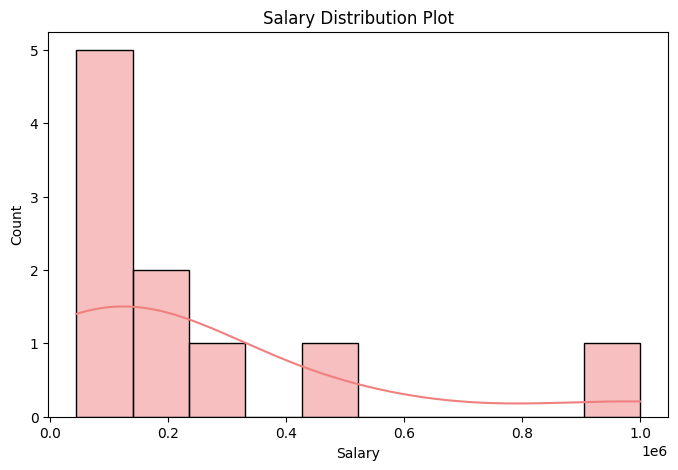

In [9]:
# Distribución de salarios
plt.figure(figsize=(8,5))
plt.title('Salary Distribution Plot')
sns.histplot(df_sal['Salary'], bins=10, kde=True, color='lightcoral')
plt.show()


### Explicación

- `sns.histplot()` genera un histograma del salario.  
- `bins=10`: define la cantidad de barras en el histograma.  
- `kde=True`: añade una curva de densidad, mostrando la tendencia de la distribución.  
- Este gráfico permite detectar **concentraciones de salarios y posibles valores extremos**.


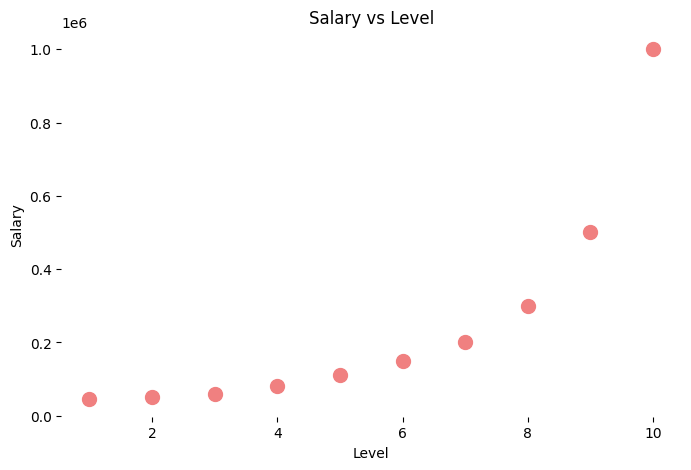

In [10]:
# Gráfico de dispersión
plt.figure(figsize=(8,5))
plt.scatter(df_sal['Level'], df_sal['Salary'], color='lightcoral', s=100)
plt.title('Salary vs Level')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.box(False)
plt.show()


###  Explicación Detallada y Qué Deberías Observar

**1. Qué hace cada comando:**

- `plt.scatter(x, y, color='lightcoral', s=100)`:  
  - Dibuja **puntos individuales** para cada nivel y su salario correspondiente.  
  - `s=100` aumenta el tamaño de los puntos para que sean visibles.  
  - `color='lightcoral'` da consistencia visual con el histograma anterior.  
- `plt.title()`, `plt.xlabel()`, `plt.ylabel()`: títulos y etiquetas claros.  
- `plt.box(False)`: elimina el borde del gráfico para un estilo más limpio.  
- `plt.show()`: muestra el gráfico.

**2. Qué deberías observar:**

- Los puntos muestran **la relación directa entre el nivel del puesto y el salario**.  
- Al observar el scatter plot:  
  - Para niveles bajos y medios, el salario aumenta gradualmente.  
  - Para niveles altos (8, 9, 10), el salario aumenta de forma **mucho más pronunciada**, indicando un comportamiento **no lineal**.  

**3. Conclusión preliminar:**

- La relación **no es perfectamente lineal**, por lo que una **línea recta simple** (regresión lineal) podría subestimar o sobreestimar los salarios para niveles altos.  
- Esto justifica el uso de una **regresión polinómica**, que ajusta una curva y puede capturar mejor la aceleración de los salarios en niveles altos.


In [11]:
# Variables independientes y dependientes
X = df_sal.iloc[:, 1:-1].values   # Level
y = df_sal.iloc[:, -1].values     # Salary


### Explicación

- `iloc[:, 1:-1]` selecciona la columna `Level` (independiente).  
- `iloc[:, -1]` selecciona la columna `Salary` (dependiente).  
- `.values` convierte a arreglo NumPy, compatible con sklearn.


In [12]:
# Regresión Lineal
lr = LinearRegression()
lr.fit(X, y)

# Regresión Polinómica (grado 3)
pr = PolynomialFeatures(degree=3)
X_poly = pr.fit_transform(X)
lr_2 = LinearRegression()
lr_2.fit(X_poly, y)


LinearRegression()

### Explicación

- `lr.fit(X, y)` entrena la regresión lineal simple.  
- `PolynomialFeatures(degree=3)` crea términos `[1, X, X^2, X^3]`.  
- `lr_2.fit(X_poly, y)` entrena la regresión polinómica sobre estos términos.


In [13]:
# Predicciones
y_pred_lr = lr.predict(X)           # Lineal
y_pred_poly = lr_2.predict(X_poly)  # Polinómica


### Explicación

- `predict()` obtiene los valores estimados del salario para cada nivel.  
- Se compararán los resultados con los datos reales.


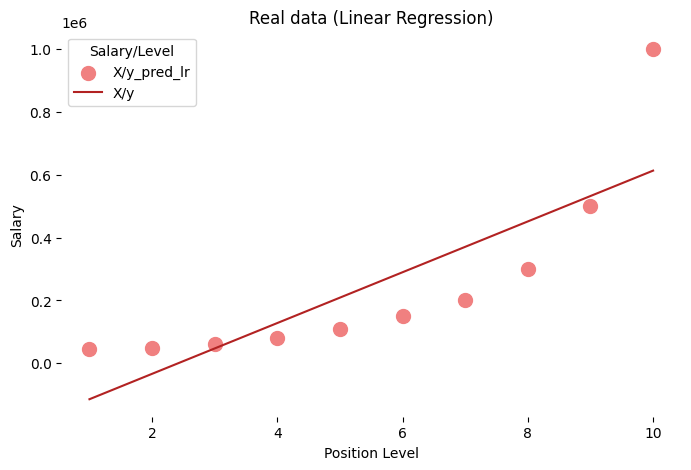

In [14]:
# Scatter + línea lineal
plt.figure(figsize=(8,5))
plt.scatter(X, y, color='lightcoral', s=100)
plt.plot(X, y_pred_lr, color='firebrick')
plt.title('Real data (Linear Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.legend(['X/y_pred_lr', 'X/y'], title='Salary/Level', loc='best', facecolor='white')
plt.box(False)
plt.show()


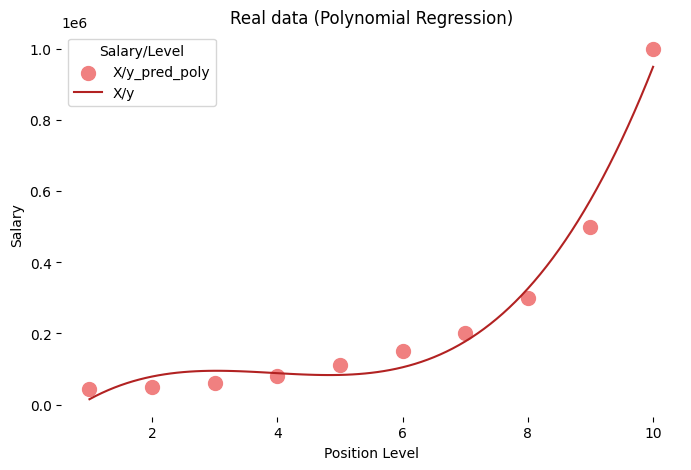

In [15]:
# Crear X_grid para curva polinómica suave
X_grid = np.arange(X.min(), X.max()+0.1, 0.1).reshape(-1,1)

plt.figure(figsize=(8,5))
plt.scatter(X, y, color='lightcoral', s=100)
plt.plot(X_grid, lr_2.predict(pr.transform(X_grid)), color='firebrick')
plt.title('Real data (Polynomial Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.legend(['X/y_pred_poly', 'X/y'], title='Salary/Level', loc='best', facecolor='white')
plt.box(False)
plt.show()


### Explicación

- `X_grid` crea más puntos para suavizar la curva polinómica.  
- `pr.transform(X_grid)` aplica la transformación polinómica a los nuevos puntos.  
- Esto genera un gráfico más preciso de la curva ajustada.


In [16]:
# Predecir salario para nivel 6.5
pred_lr = lr.predict([[6.5]])
pred_poly = lr_2.predict(pr.transform([[6.5]]))

print(f'Linear Regression result: {pred_lr}')
print(f'Polynomial Regression result: {pred_poly}')


Linear Regression result: [330378.78787879]
Polynomial Regression result: [133259.46969697]


### Explicación

- Se predice el salario para un nivel intermedio (6.5).  
- La regresión polinómica suele ajustarse mejor en rangos no lineales.


#  Conclusión

 La **regresión lineal** se queda corta cuando la relación entre las variables no es una línea recta.  
 La **regresión polinomial** puede representar mejor esas relaciones curvilíneas.  
 Un **grado mayor** puede mejorar el ajuste, pero también puede provocar *sobreajuste* (overfitting).

Usa regresión polinomial cuando los datos tengan una tendencia **no lineal**, pero siempre evalúa el modelo con métricas como **R²** y visualizaciones.
